<a href="https://colab.research.google.com/github/AnnaVithoriaMS/Analise-de-dados-de-diamantes/blob/main/Regress%C3%A3o_e_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Os dados utilizados são os mesmos usados no relatório anterior. Um modelo é uma relação matemática entre variáveis diferentes. O aprendizado de máquina se refere ao uso dos modelos que são aprendidos a partir dos dados.


Os **modelos supervisionados** são aqueles em que o conjunto de dados de treinamento são fornecidos ao algoritmo incluindo as soluções deseijadas, os **modelos não supervisonados** são aqueles em que as repostas desejadas não são inclusas. Já o **semi-supervisionado** são algoritmos que lidam com dados de treinamento parcialmente rotulados.

Mas aqui será tratado os modelos supervisionados que são:


*   Regressão 
*   Classificação




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from plotnine import *

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/diamonds.csv')

In [ ]:
df['volume'] = df['x']*df['y']*df['z']
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['x','y','z'], axis=1, inplace= True)

In [ ]:
import numpy.linalg as la 
DF =  df.select_dtypes(include=np.number)
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   volume  53940 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 2.1 MB


Os dados foram divididos em conjunto de treino e conjunto de teste. Os dados do conjunto de treinamento foram preprocessados, buscando evitar que dados faltante, outliers e inconsistencias afetem o resultado dos modelos.

O modelo regressivo  é uma forma de aprendizagem de máquina supervisionada, isto é nos dados de treinamento que são fornecidos ao algoritmo há as soluções desejadas, os rótulos. Assim a regressão é usada para prever o valor de uma variável em detrimento de outras, as variáveis preditoras.


In [ ]:
from sklearn.model_selection import train_test_split
X = DF.drop(['price'], axis=1)
y = DF['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X_train)
X_train = imputer.transform(X_train)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

print(X_train.shape, y_train.shape)

(42263, 5) (42263,)


In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler , StandardScaler,LabelEncoder

A forma mais comum de analisar o desempenho de um modelo regressivo é por meio do Raiz do Erro Quadrático Médio (RMSE), logo para treinar um modelo é necessário buscar os valores de coeficientes que minimizam o erro. Outra métrica útil para avaliar os resultados é o R2 em que é medida a proporção de variação dos dados

O RMSE dá uma ideia da quantidade de erros gerados pelo sistema em suas prevessões. Para cada ponto de dados, a fórmula do RMSE calcula a diferença entre o valor real do ponto e o valor do mesmo na curva de melhor ajuste.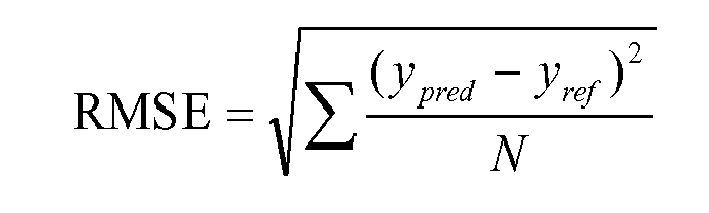

O MAE é a soma de todas as magnitudes de erro dividida pelo número de pontos, portanto, essencialmente, o erro médio.
Portanto, quanto menor o MAE, menor será o erro em seu modelo. Assim o RMSE e o MAE são formas de medir a distância entre dois vetores, o vetor de valores previstos e o de valores rotulados.

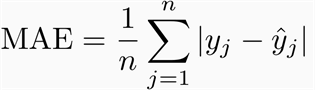

O R-Quadrado (R2) é uma medidad de quão proximo os dados estão da linha de regressão, também conhecido como coeficiente de determinação. O qual pode variar enytre 0 e 1. No caso de ser igual 0 o modelo não explica a variabilidade dos dados, já ao se aproximar de 1 o modelo explica a variabilidade dos dados em relação a média.

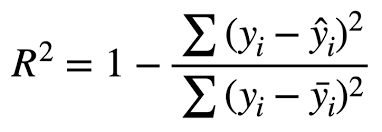

O gráfico de resíduos mostra a diferença entre os resíduos no eixo vertical e a variável dependente no eixo horizontal, permitindo detectar regiões dentro do alvo que podem ser suscetíveis a mais ou menos erros. Um uso comum do gráfico de resíduos é analisar a variância do erro do regressor. 

Se os pontos estiverem dispersos aleatoriamente em torno do eixo horizontal, um modelo de regressão linear geralmente é apropriado para os dados

A Cross Validaton é uma ferramenta utilizada para a avaliação do modelo preditivo. A CV divide os dados em subconjuntos, os quais são usados para treino e teste do modelo, permitindo a avaliação do modelo. 
A validação cruzada foi deita dividindo o conjuto de dados em 5  partes, objetivando entender a acuracia. 

**REGRESSÃO LINEAR**

A regressão linear faz uma previsão por meio da soma ponderada das entradas. Em que Y é o valor de saída, o qual desejamos prever, enquanto X são as variáveis independentes ou entradas. Os coeficientes 𝛽1 a 𝛽n são os parâmetros do modelo, enquanto 𝛽0 é o interceptor da linha de regressão, já 𝜖 é o valor do erro ou resíduo.

Y=β0+β1X1+β2X2+...+βpXp+ϵ


In [ ]:
linreg = LinearRegression().fit(X_train, y_train)

In [ ]:
print('Coeficientes do modelo linear : {}'
.format(linreg.coef_))
print('Inteceptador: ',linreg.intercept_)


Coeficientes do modelo linear : [-1012.49402999  -109.13435332  -163.35254028  4918.30324599]
Inteceptador:  3947.9576741800515


In [ ]:
y_pred = linreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

MAE    : 991.70 
RMSE   : 1510.44 
R2     : 0.85 


In [ ]:
print('R-squared score (training): {:.3f}'
.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
.format(linreg.score(X_test, y_test)))

R-squared score (training): 0.858
R-squared score (test): 0.853


Grafico Resíduos

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


0.853091546431538

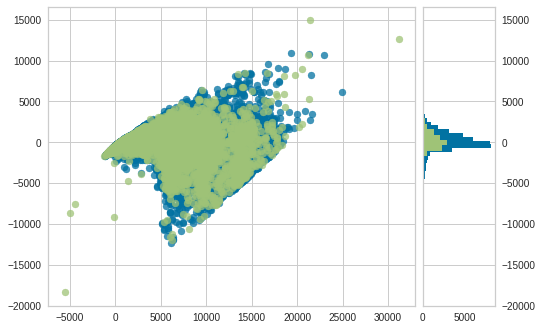

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(linreg, hist=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

0.853091546431538

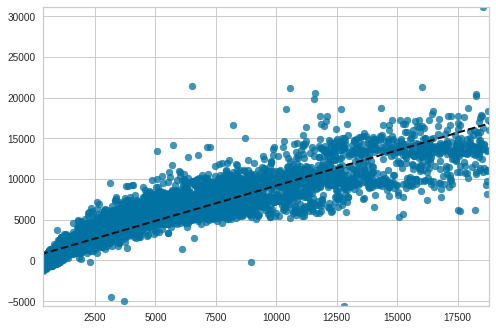

In [ ]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(linreg)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import  KFold , cross_val_score
accuracies5 = cross_val_score(estimator = linreg, X = X_train, y = y_train, cv = 5,verbose = 1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [ ]:
print(accuracies5)

[0.86179996 0.85350146 0.86184274 0.85861172 0.85351455]


Pelos resultados obtidos de R-quadrado e RMSE o modelo linear pode ser considerado bom. O grafico de resíduos e a validação cruzada também deixam isso perceptível. Já que os valores de R2 estao proximos de 1 e o grafico mostra pontos dispersos em torno do eixo. O que é possivel notar é que os resultados são considerados satisfatória, tendo em vista que a escolha dos conjuntos de treino e teste é feita de forma aleatória, o pior caso (0.85350146) é proximo do melhor (0.86184274)

**Regressão Lasso**

A Regressão Lasso faz o uso da Reularização L1, se trata de uma regressão semelhante à linear, o que ocorre é a minimização da soma dos resíduos quadrados somados a uma constante lambda multiplicada pela soma dos coeficientes em módulo.
 
É possivel entender a regularização como a incerção de bias, assim o ajuste em execesso aos dados é evitado, para que ocorra a redução da variância. As regressões Ridge e Lasso são formas de regularizarmos a nossa função através de penalidades. Alterando  fatores de forma a priorizar ou não certas parcelas da equação e, assim, evitar ‘overfitting’ e melhorar a qualidade de predição.

Quando o valor de lambda é igual a zero temos o mesmo resultado que uma regressão linear. Já quando é maior que zero, aumentando o número de coeficientes eliminados. Em outras palavras, lambda será determinante para a complexidade do modelo. Quanto mais alto, maior o viés. Quanto mais baixo, maior a variância. Em outras palavras, um lambda muito baixo pode levar ao overfitting.  

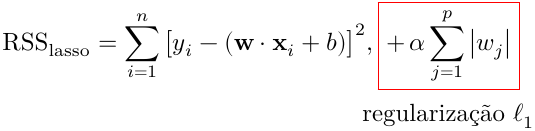

In [ ]:
modelo_lasso = Lasso()
modelo_lasso.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2224461096.751938, tolerance: 66146545.178570196
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
modelo_lasso.intercept_

3925.905842274792

In [ ]:
modelo_lasso.coef_

array([ 671.97560823, -165.30208075, -194.00767101, 3171.0229777 ])

In [ ]:
y_pred_lasso = modelo_lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lasso)
mae = mean_absolute_error(y_test, y_pred_lasso)
rmse = mean_squared_error(y_test, y_pred_lasso)**0.5
r2 = r2_score(y_test, y_pred_lasso)

In [ ]:

print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

MAE    : 1002.63 
RMSE   : 1528.52 
R2     : 0.86 


In [ ]:
print('R-squared score (training): {:.3f}'
.format(modelo_lasso.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
.format(modelo_lasso.score(X_test, y_test)))

R-squared score (training): 0.857
R-squared score (test): 0.855


Grafico Resíduos

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2224461096.751938, tolerance: 66146545.178570196
  positive)


0.8551573939462871

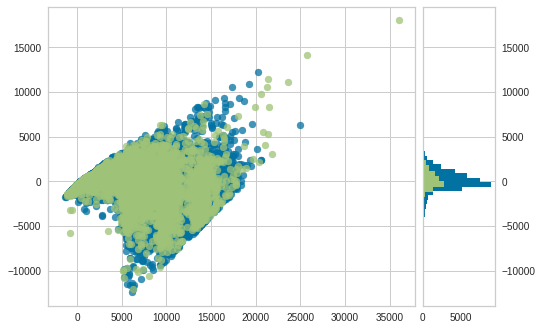

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(modelo_lasso, hist=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2421858849.4582977, tolerance: 66780968.42501899
  positive)


0.8548823096759167

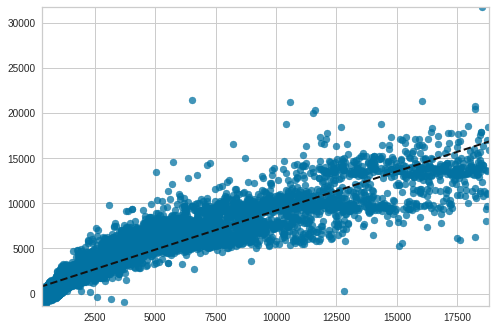

In [ ]:
visualizer = PredictionError(modelo_lasso)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  


In [ ]:
lasso_cv5 = cross_val_score(estimator = modelo_lasso, X = X_train, y = y_train, cv = 5,verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1874748091.6224518, tolerance: 53345534.87772935
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1929245691.4440613, tolerance: 53637025.097980656
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2214216477.445366, tolerance: 54060395.11513272
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not conv

In [ ]:
lasso_cv5

array([0.86145287, 0.85329363, 0.86210221, 0.85806436, 0.85356913])

Para um valor de alfa igual a 1 os resultados obtidos tambem são considerados bons para a regressão lasso. São valore bem proximos aos encontrados na regressão linear. 
Os valores de R2 é considerado bom, assim com a cross validation. E a representação do grfico de ressíduos não há a linearidade, o que é bom


**REGRESSÃO RIDGE**

A Regressão Ridge ou L2 a penalização consiste nos quadrados dos coeficientes, ao invés de seus módulos. 
Se com L1 estamos reduzindo alguns coeficientes a zero, quando falamos de L2, eles podem no máximo chegarem próximos a zero, mas nunca vão se tornar zero. Assim é possivel tornar o modelo mais simples reduzindo a magnitude dos regressores, mas não eliminá-los.Assim podemos minimizar a soma dos resíduos quadrados somada a lambda multiplicado pela soma dos coeficientes ao quadrado.

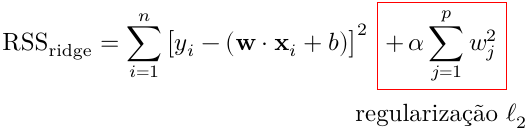

In [ ]:
modelo_ridge = Ridge(normalize=True)

In [ ]:
modelo_ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
ypred = modelo_ridge.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, ypred)
mae = mean_absolute_error(y_test, ypred)
rmse = mean_squared_error(y_test, ypred)**0.5
r2 = r2_score(y_test, ypred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


MSE    : 3680601.38 
MAE    : 1295.81 
RMSE   : 1918.49 
R2     : 0.76 


In [ ]:
modelo_ridge.coef_

array([1243.16249875,  -40.56932613,   26.3733545 , 1284.79160462])

In [ ]:
modelo_ridge.intercept_

3957.5546661083913

Grafico Resíduos

0.7629958037465534

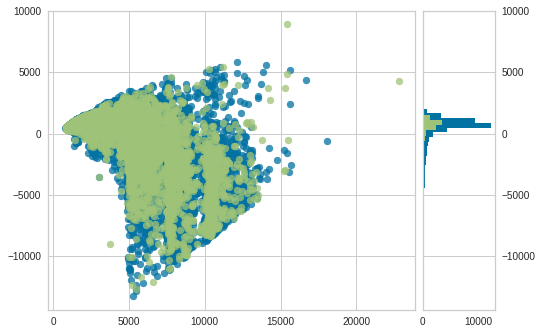

In [ ]:
visualizer = ResidualsPlot(modelo_ridge, hist=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

0.758181614452487

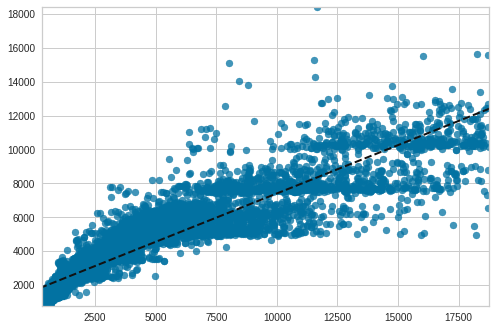

In [ ]:
visualizer = PredictionError(modelo_ridge)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  

In [ ]:
ridge_cv5 = cross_val_score(estimator = modelo_ridge, X = X_train, y = y_train, cv = 5,verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [ ]:
ridge_cv5

array([0.7601847 , 0.75559058, 0.75989717, 0.76004807, 0.76330129])

Dos três modelos avaliados o ridge foi o de resultados menos satisfatórios, não necessariamente ruim, porém os outros são melhores. A avaliação dos valores encontrados para R-quadrado e cross validation são bons, assim como a interpretação dos gráficos. 

**CLASSIFICAÇÃO**

A acuracia do método (***accuracy***) mede quantas das amostras foram classificadas corretamentes pelo modelo, independente da classe de que ela pertença. Já a precisão (***precision***) é medida dividindo a quantidade de classificações que foi feita corretamente pela soma de classificações corretas e erradas, indicando a exatidão do modelo.

Já o ***recall*** é uma medida de sensibilidade do modelo, logo é a capacidade do modelo de encontrar todas a clacificações positivas, assim é possível saber quais das classificações positivas são realmente positivas. A ***score F1*** é a média harmonica entre a precisão e a revocação, assim a melhor pontução é 1 e a pior 0.


A ***matriz de confusão*** apresenta as frequencias de classificação para cada classe do modelo. Além mostrar o número de previsões corretas e incorretas categorizadas
por tipo de resposta. As previsões corretas aparecem na diagonal principal da matriz, já os valores fora da diagonal são as classificações inadequadas.

In [ ]:
df["cut"].replace({"Fair": 0,
"Good": 1, "Very Good":2,"Ideal":3 ,"Premium":4}, inplace=True)

In [ ]:
import numpy.linalg as la 
DF =  df.select_dtypes(include=np.number)
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   cut     53940 non-null  int64  
 2   depth   53940 non-null  float64
 3   table   53940 non-null  float64
 4   price   53940 non-null  int64  
 5   volume  53940 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 2.5 MB


In [ ]:
from sklearn.model_selection import train_test_split
X = DF.drop(['cut'], axis=1)
y = DF['cut']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
print(X_train.shape, y_train.shape)

(44950, 5) (44950,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

**Naive Bayes**

O Naive Bayes é um algoritmo probabilístico simples baseado no teorema de Bayes.
Este utiliza dados de treino para formar um modelo probabilístico baseado na evidência das features nos dados. 
Assim o classificador tem como base a suposição simplificadora de que os valores dos atributos são condicionalmente independentes dada a classe.



In [ ]:
gnb = GaussianNB().fit(X_train, y_train)
y_pred_nb = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_nb)

In [ ]:
accuracy

0.5972191323692992

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred_nb))      


              precision    recall  f1-score   support

           0       1.00      0.17      0.29       357
           1       0.37      0.27      0.31       836
           2       0.40      0.24      0.30      2099
           3       0.67      0.96      0.79      3817
           4       0.57      0.49      0.52      1881

    accuracy                           0.60      8990
   macro avg       0.60      0.43      0.44      8990
weighted avg       0.57      0.60      0.56      8990



O modelo possui uma acuracia de aproxidamente 60%, podendo ser considerado bom, visto que mais de 50% das amostras foi classificada corretamente. No entanto alfumas precisões foram baixas, assim como o f1-score, alguns valores, estam mais proximos de 0 do que de 1.



0.5972191323692992

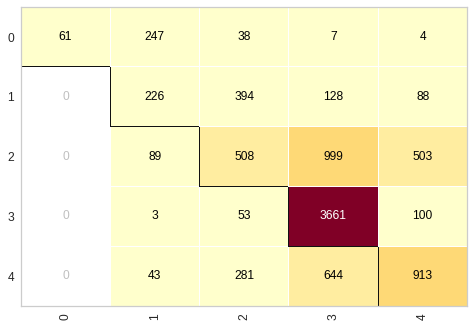

In [ ]:

from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(gnb, classes=[0,1,2,3,4])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)


0.5972191323692992

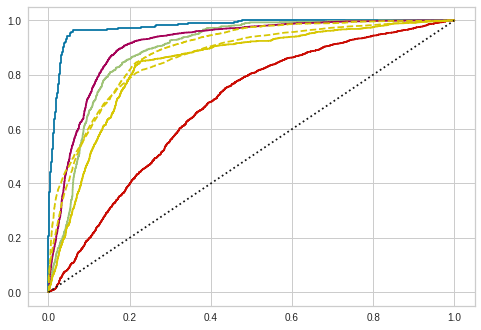

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(gnb, classes=[0,1,2,3,4])

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
 

**SVM**

O algoritmo de Support Vector MachineNesse  plotamos  cada  item  de  dados  como  um  ponto  no  espaço n-dimensional, com o valor de cada recurso sendo o valor de uma determinada coordenada. Então, nós executamos a classificação encontrando o hiperplano que melhor diferencia as duas classes.

In [ ]:
svm = SVC(gamma='auto').fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_svm)
accuracy

0.42981090100111236

In [ ]:
print(metrics.classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29       357
           1       0.37      0.27      0.31       836
           2       0.40      0.24      0.30      2099
           3       0.67      0.96      0.79      3817
           4       0.57      0.49      0.52      1881

    accuracy                           0.60      8990
   macro avg       0.60      0.43      0.44      8990
weighted avg       0.57      0.60      0.56      8990



A acurácia do modelo SVM é ruim, visto que aproximadamente 43% dos amostras foram classificadas corretamente, assim nem ao menos metade das amostras foi classificada de maneira satisfatoria. As precissões algumas foram baixas, assim como os f1-scores, que em sua maioria foram abaixo de 0.5.

0.42981090100111236

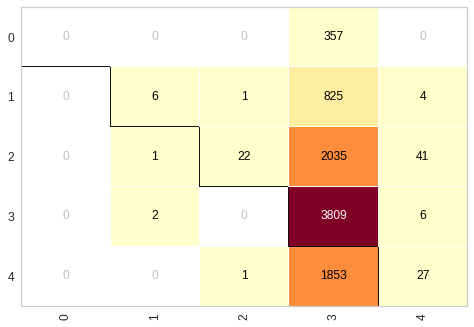

In [ ]:

from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(svm, classes=[0,1,2,3,4])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

**KNN**



O knn tenta rotular uma amostra com base em suas amostras vizinhas, presentes no conjunto de treinamento. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([2, 1, 1, ..., 3, 0, 3])

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.2482758620689655

In [ ]:
print(metrics.classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.25      0.20      0.22       357
           1       0.07      0.36      0.12       836
           2       0.49      0.07      0.12      2099
           3       0.40      0.42      0.41      3817
           4       0.27      0.06      0.10      1881

    accuracy                           0.25      8990
   macro avg       0.30      0.22      0.20      8990
weighted avg       0.36      0.25      0.24      8990



NO casso do knn a acuracia é bem ruim, visto que 25% das amostras tem a sua classificação feita de maneira adequada, alem que as outra métricas também serem de valores bem abaixo do deseijado.

0.2482758620689655

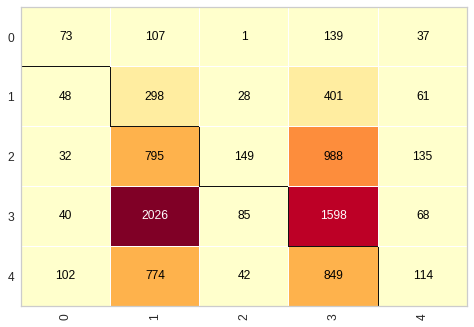

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(knn, classes=[0,1,2,3,4])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Conclusão

É possível concluir que o entre os modelos de regressão ue foram testados os modelos linear e lasso deram bons resultados e que poderiam ser usado, o modelo ridge também pode ser usado, porém os resultados são menos satisfatorios comparado aos outros dois.

Já os modelos de classificação o que gerou melhor resultados foi o Naive Bayes, os outros modelos testado apesentaram resultados piores que o NB, talvez fosse necessaria a testagem de outros modelos na tentativa de escolher um mais adequado.